In [1]:
#Importing packages 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from collections import Counter

import itertools
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)


In [2]:
# Mounting the Google Drive to Google Colab
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
!ls

Mounted at /content/gdrive
drive  gdrive  sample_data


In [3]:
import os
os.chdir("/content/gdrive/MyDrive/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/data.0.1")
!ls

example_physionet.py  RECORDS	  scp_statements.csv  XTrain.npy
LICENSE.txt	      records100  SHA256SUMS.txt      yTest.npy
ptbxl_database.csv    records500  XTest.npy	      yTrain.npy


Loading the dataset from NumPy Files

In [4]:
# Load the train and test data from the NumPy files saved from the first notebook.

#Waveform data
#ECG signal data X of shape [N,L,12] in Millivolts (mV)
X_train = np.load('/content/gdrive/MyDrive/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/data.0.1/XTrain.npy')
X_test = np.load('/content/gdrive/MyDrive/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/data.0.1/XTest.npy')

#Labels
# multi-hot encoded labels y of shape [N,C]
y_train = np.load('/content/gdrive/MyDrive/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/data.0.1/yTrain.npy')
y_test = np.load('/content/gdrive/MyDrive/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/data.0.1/yTest.npy')

In [5]:
print('X_train: \n', len(X_train))
print('X_test: \n',len(X_test))
print('Y_train: \n',len(y_train))
print('Y_test: \n',len(y_test))

X_train: 
 28264
X_test: 
 9421
Y_train: 
 28264
Y_test: 
 9421


MODEL TRAINING

In [6]:
# Import all the necessary things for model-training.

import keras
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout, Dense, Activation
from tensorflow.keras.layers import GlobalAveragePooling1D, BatchNormalization, LSTM, Bidirectional

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.regularizers import l1, l2, l1_l2


Building the neural network

In [7]:
reg2 = l2(0.01)  # L2 regularizer

model = Sequential()

model.add(Conv1D(filters=128,kernel_size=1, activation="relu", input_shape = (36, 1)))
model.add(Conv1D(filters=128,kernel_size=1, activation="relu"))
model.add(MaxPooling1D(pool_size=1))
model.add(Dropout(0.1))

model.add(Conv1D(filters=128, kernel_size=1, activation="relu"))
model.add(Conv1D(filters=128, kernel_size=1, activation="relu"))
model.add(MaxPooling1D(pool_size=1))
model.add(Dropout(0.1))

model.add(Conv1D(filters=256, kernel_size=1, activation="relu"))
model.add(Conv1D(filters=256, kernel_size=1, activation="relu"))
model.add(MaxPooling1D(pool_size=1))
model.add(Dropout(0.1))

model.add(Conv1D(filters=256, kernel_size=1, activation="relu"))
model.add(Conv1D(filters=256, kernel_size=1, activation="relu"))
model.add(MaxPooling1D(pool_size = 1))
model.add(Dropout(0.1))

model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Dropout(0.1))

model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.1))

model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(units=256,activation="relu", kernel_regularizer = reg2, bias_regularizer = reg2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(units=256,activation="relu", kernel_regularizer = reg2, bias_regularizer = reg2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(units=10, activation="softmax"))


In [59]:
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x = X_train, y = y_train,validation_data=(X_test, y_test), batch_size = 128, epochs = 70)

Epoch 1/70
221/221 [==============================] - 21s 58ms/step - loss: 0.0497 - accuracy: 0.9975 - val_loss: 0.4001 - val_accuracy: 0.9414
Epoch 2/70
221/221 [==============================] - 10s 45ms/step - loss: 0.0605 - accuracy: 0.9978 - val_loss: 0.3569 - val_accuracy: 0.9475
Epoch 3/70
221/221 [==============================] - 10s 45ms/step - loss: 0.0555 - accuracy: 0.9976 - val_loss: 0.4262 - val_accuracy: 0.9383
Epoch 4/70
221/221 [==============================] - 10s 45ms/step - loss: 0.0516 - accuracy: 0.9991 - val_loss: 0.3407 - val_accuracy: 0.9494
Epoch 5/70
221/221 [==============================] - 10s 46ms/step - loss: 0.0556 - accuracy: 0.9970 - val_loss: 0.3410 - val_accuracy: 0.9530
Epoch 6/70
221/221 [==============================] - 10s 46ms/step - loss: 0.0601 - accuracy: 0.9977 - val_loss: 0.3820 - val_accuracy: 0.9477
Epoch 7/70
221/221 [==============================] - 10s 46ms/step - loss: 0.0557 - accuracy: 0.9978 - val_loss: 0.3504 - val_accuracy:

In [ ]:
model.summary()

In [61]:
score = model.evaluate(X_test, y_test, batch_size = 128)

74/74 [==============================] - 1s 18ms/step - loss: 0.3142 - accuracy: 0.9521


In [99]:
# THE FINAL ACCURACY RESULT OF THE MODEL:

print("Loss: ", round(score[0]*100, 2))
print("Accuracy: ", round(score[1]*100, 2))

Loss:  31.42
Accuracy:  95.21


In [63]:
# y_pred = an array of all the predicted classes or labels.

y_pred = np.argmax(model.predict(X_test), axis = -1)


In [64]:
# TO FIND THE ACCURACY OF MODEL ON EACH OF THE CLASSES 

from sklearn.metrics import confusion_matrix

cmat = confusion_matrix(y_test, y_pred)    

all_acc = cmat.diagonal()/cmat.sum(axis = 1)    # all_acc is an array containing accuracies of the model on each of the classes

In [66]:
all_acc

array([0.99734043, 0.9762931 , 0.84065245, 0.96251266, 0.84004128,
       1.        , 0.99865772, 1.        , 0.86462324, 1.        ])

In [67]:
#PRINT THE APPROXIMATE VALUES OF ACCURACY OF MODEL ON EACH OF THE CLASSES:

for i in range(len(all_acc)):
  
  if(i==0):
    temp = 'ALMI'
  elif(i==1):
    temp = 'AMI'
  elif(i==2):
    temp = 'ASMI'
  elif(i==3):
    temp = 'ILMI'
  elif(i==4):
    temp = 'IMI'
  elif(i==5):
    temp = 'IPLMI'
  elif(i==6):
    temp = 'IPMI'
  elif(i==7):
    temp = 'LMI'
  elif(i==8):
    temp = 'NORM'
  else:
    temp = 'PMI'
  
  print('Accuracy of the model on   ' + temp + ' = ', np.round(all_acc[i]*100, 2))

Accuracy of the model on   ALMI =  99.73
Accuracy of the model on   AMI =  97.63
Accuracy of the model on   ASMI =  84.07
Accuracy of the model on   ILMI =  96.25
Accuracy of the model on   IMI =  84.0
Accuracy of the model on   IPLMI =  100.0
Accuracy of the model on   IPMI =  99.87
Accuracy of the model on   LMI =  100.0
Accuracy of the model on   NORM =  86.46
Accuracy of the model on   PMI =  100.0


Confusion matrix:

  [[1125    0    3    0    0    0    0    0    0    0]
 [   2  906    8    3    5    0    0    0    4    0]
 [   9   29  670   17   39    0    0    8   25    0]
 [   1    2   11  950   20    0    0    0    3    0]
 [   6   10   42   33  814    0    1    9   54    0]
 [   0    0    0    0    0  911    0    0    0    0]
 [   0    0    0    0    1    0  744    0    0    0]
 [   0    0    0    0    0    0    0 1112    0    0]
 [   3   13   31    3   51    0    1    4  677    0]
 [   0    0    0    0    0    0    0    0    0 1061]]





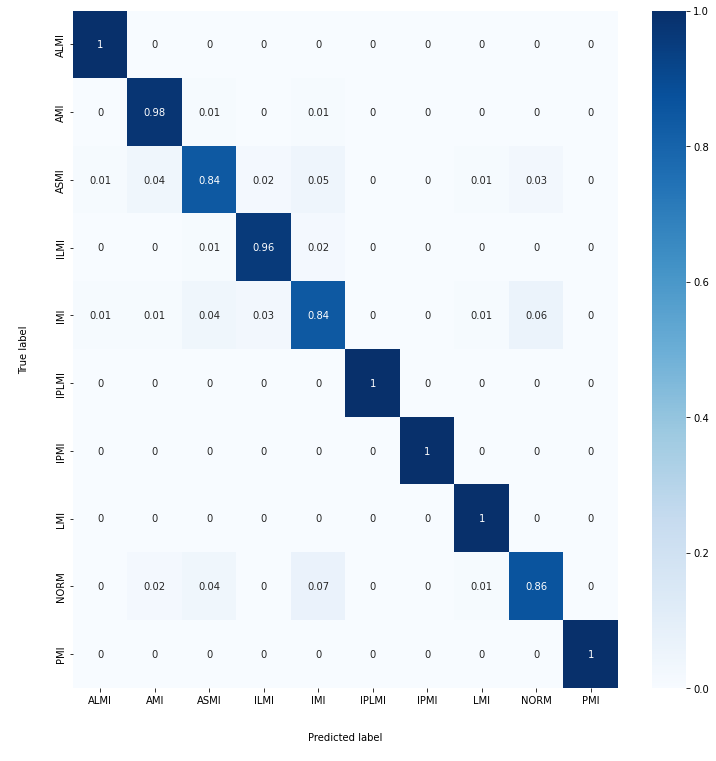

In [81]:
#Confusion matrix.
import seaborn as sns
print("Confusion matrix:\n\n ",cmat)
print("\n\n")

cmat = confusion_matrix(y_test, y_pred)    

con_mat_norm = np.around(cmat.astype('float') / cmat.sum(axis=1)[:, np.newaxis], decimals=2)
classes=['ALMI','AMI', 'ASMI','ILMI','IMI','IPLMI','IPMI','LMI','NORM','PMI']
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

figure = plt.figure(figsize=(10, 10))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('\nTrue label\n\n')
plt.xlabel('\n\nPredicted label\n')
plt.show()

In [90]:
#To evaluate the model using other performance metric
from sklearn.metrics import classification_report

classes=['ALMI','AMI', 'ASMI','ILMI','IMI','IPLMI','IPMI','LMI','NORM','PMI']  
label=[0,1,2,3,4,5,6,7,8,9]
print(classification_report(y_test, y_pred,  labels=label, target_names=classes))



              precision    recall  f1-score   support

        ALMI       0.98      1.00      0.99      1128
         AMI       0.94      0.98      0.96       928
        ASMI       0.88      0.84      0.86       797
        ILMI       0.94      0.96      0.95       987
         IMI       0.88      0.84      0.86       969
       IPLMI       1.00      1.00      1.00       911
        IPMI       1.00      1.00      1.00       745
         LMI       0.98      1.00      0.99      1112
        NORM       0.89      0.86      0.88       783
         PMI       1.00      1.00      1.00      1061

    accuracy                           0.95      9421
   macro avg       0.95      0.95      0.95      9421
weighted avg       0.95      0.95      0.95      9421



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


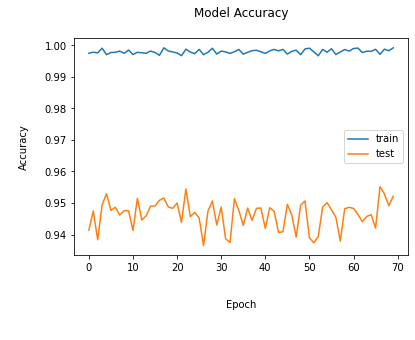

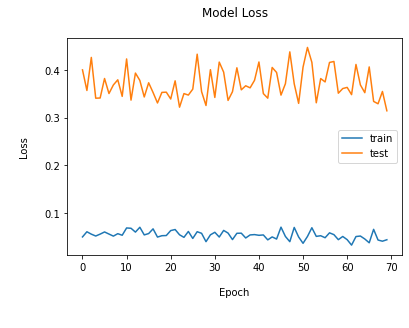

In [104]:
#visual 
# ref : https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/classification.ipynb

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy\n')
plt.ylabel('\nAccuracy\n')
plt.xlabel('\n\nEpoch\n\n')
plt.legend(['train', 'test'], loc='center right')
plt.show()
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss\n')
plt.ylabel('\nLoss\n')
plt.xlabel('\nEpoch\n\n')
plt.legend(['train', 'test'], loc='center right')
plt.show()


In [ ]:
#https://stackoverflow.com/questions/56090541/how-to-plot-precision-and-recall-of-multiclass-classifier
#https://www.kdnuggets.com/2020/05/model-evaluation-metrics-machine-learning.html
#https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a
#https://colab.research.google.com/drive/1S9ThhinDflxU4KmTdxcv6_mE_vWwk2Jk#scrollTo=QOIbCQ3T9bml